In [11]:
from __future__ import absolute_import, division, print_function
#
import tensorflow as tf
from tensorflow import keras
#
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
# 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

Carga de los datos de Fashion MNIST

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
test_images.shape

(10000, 28, 28)

Normalizado de los datos de las imagenes

In [7]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Visualización de algunos ejemplos de imagenes

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

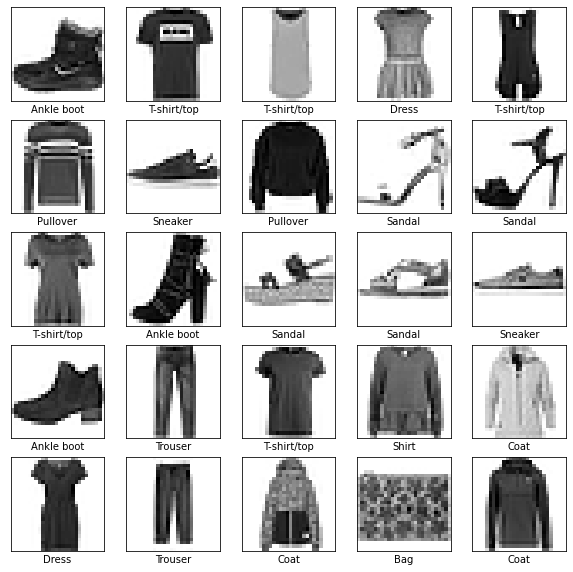

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Parametros empleados en las redes neuronales

In [13]:
input_shape = (28*28,) # 784
intermediate_dim_1 = 128
intermediate_dim_2 = 64
intermediate_dim_3 = 32
intermediate_dim_4 = 16
latent_dim = 3

## Codificación del encoder

Model: "dense_encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 784)]             0         
_________________________________________________________________
activation (Activation)      (None, 784)               0         
_________________________________________________________________
hidden_layer_1_e (Dense)     (None, 128)               100480    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
hidden_layer_2_e (Dense)     (None, 64)                8256      
_________________________________________________________________
activation_2 (Activation)    (None, 64)                0         
_________________________________________________________________
hidden_layer_3_e (Dense)     (None, 32)              

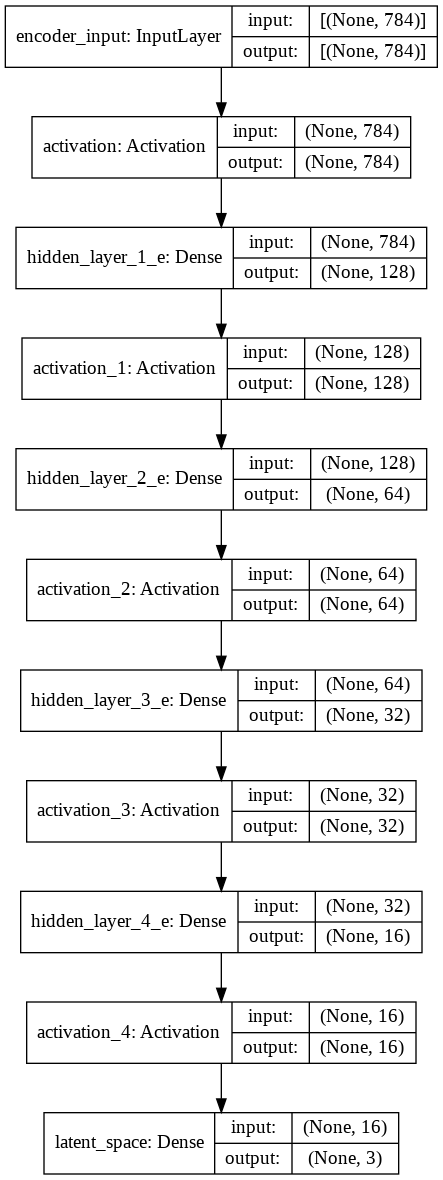

In [14]:
# Define encoder model
inputs = Input(shape=input_shape,name='encoder_input')
x = Activation('relu')(inputs)
x = Dense(intermediate_dim_1, name='hidden_layer_1_e')(x)
x = Activation('relu')(x)
x = Dense(intermediate_dim_2, name='hidden_layer_2_e')(x)
x = Activation('relu')(x)
x = Dense(intermediate_dim_3, name='hidden_layer_3_e')(x)
x = Activation('relu')(x)
x = Dense(intermediate_dim_4, name='hidden_layer_4_e')(x)
x = Activation('relu')(x)
outputs = Dense(latent_dim, name='latent_space')(x)
#outputs = LayerNormalization(axis=1)(x)

encoder = Model(inputs=inputs, outputs=outputs, name='dense_encoder')

encoder.summary()
plot_model(encoder, to_file='encoder_dense_fashion_minist.png', 
           show_shapes=True)

## Codificación del decoder

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   [(None, 3)]               0         
_________________________________________________________________
hidden_layer_de_4_d (Dense)  (None, 16)                64        
_________________________________________________________________
activation_6 (Activation)    (None, 16)                0         
_________________________________________________________________
hidden_layer_de_3_d (Dense)  (None, 32)                544       
_________________________________________________________________
activation_7 (Activation)    (None, 32)                0         
_________________________________________________________________
hidden_layer_de_2_d (Dense)  (None, 64)                2112      
_________________________________________________________________
activation_8 (Activation)    (None, 64)                0   

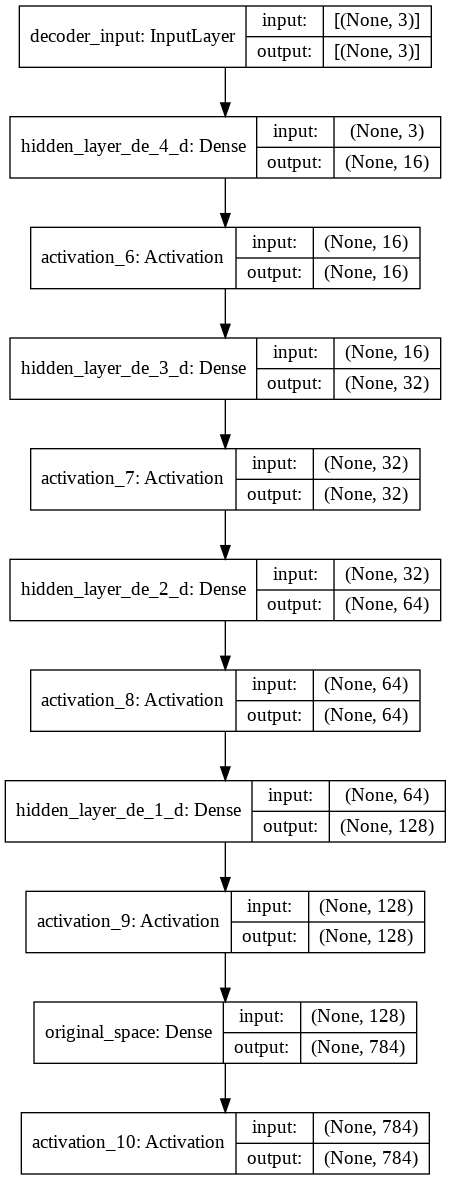

In [15]:
# Define decoder model
latent_input = Input(shape = (latent_dim,), name='decoder_input')
x = Activation('relu')(latent_input)
x = Dense(intermediate_dim_4 , name='hidden_layer_de_4_d')(latent_input)
x = Activation('relu')(x)
x = Dense(intermediate_dim_3 , name='hidden_layer_de_3_d')(x)
x = Activation('relu')(x)
x = Dense(intermediate_dim_2 , name='hidden_layer_de_2_d')(x)
x = Activation('relu')(x)
x = Dense(intermediate_dim_1 , name='hidden_layer_de_1_d')(x)
x = Activation('relu')(x)
x = Dense(input_shape[0], name='original_space')(x)
x = Activation('sigmoid')(x)

decoder = Model (inputs=latent_input, outputs=x, name='decoder')

decoder.summary()
plot_model(decoder, to_file='decoder_dense_fashion_minist.png', 
           show_shapes=True)

## Auto-encoder

Model: "autoencoder_mnist_fashion_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 784)]             0         
_________________________________________________________________
dense_encoder (Functional)   (None, 3)                 111395    
_________________________________________________________________
decoder (Functional)         (None, 784)               112176    
Total params: 223,571
Trainable params: 223,571
Non-trainable params: 0
_________________________________________________________________


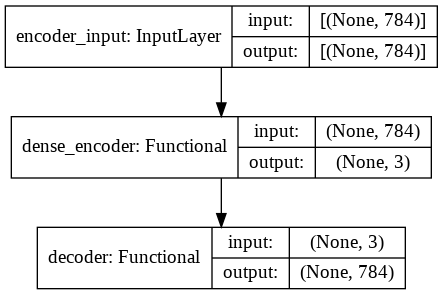

In [24]:
# Autoencoder Model
autoencoder = Model(inputs=inputs, 
                    outputs=decoder(encoder(inputs)),
                    name='autoencoder_mnist_fashion_model')

#Summary
autoencoder.summary()
plot_model(autoencoder,
           to_file='autoencoder_dense_fashion_mnist.png',
           show_shapes=True)

# Entrenamiento

In [25]:
optimizer = Adam(learning_rate=1e-3)
loss_fn = MeanSquaredError()
autoencoder.compile(optimizer= optimizer, loss = loss_fn)

In [26]:
train_images = train_images.reshape(60000, 784).astype("float32")
test_images = test_images.reshape(10000, 784).astype("float32")

In [27]:
epochs = 200
batch_size = 64

In [28]:
history = autoencoder.fit(train_images, train_images, epochs = epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/200
844/844 [==============================] - 3s 3ms/step - loss: 0.0201 - val_loss: 0.0209
Epoch 2/200
844/844 [==============================] - 2s 3ms/step - loss: 0.0202 - val_loss: 0.0206
Epoch 3/200
844/844 [==============================] - 2s 3ms/step - loss: 0.0200 - val_loss: 0.0205
Epoch 4/200
844/844 [==============================] - 2s 3ms/step - loss: 0.0201 - val_loss: 0.0212
Epoch 5/200
844/844 [==============================] - 2s 3ms/step - loss: 0.0201 - val_loss: 0.0205
Epoch 6/200
844/844 [==============================] - 2s 3ms/step - loss: 0.0200 - val_loss: 0.0206
Epoch 7/200
844/844 [==============================] - 2s 3ms/step - loss: 0.0199 - val_loss: 0.0205
Epoch 8/200
844/844 [==============================] - 2s 3ms/step - loss: 0.0199 - val_loss: 0.0206
Epoch 9/200
844/844 [==============================] - 2s 3ms/step - loss: 0.0199 - val_loss: 0.0205
Epoch 10/200
844/844 [==============================] - 2s 3ms/step - loss: 0.0199 - val_lo

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch 
hist.tail()

,loss,val_loss,epoch
195,0.019185,0.020394,195
196,0.019112,0.019795,196
197,0.019034,0.019860,197
198,0.018979,0.019807,198
199,0.018919,0.019652,199


Perdida

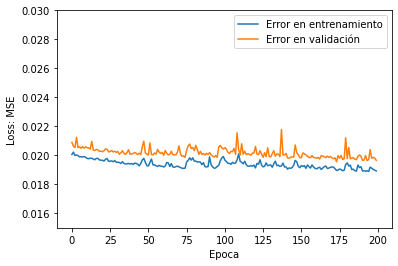

In [35]:
plt.figure()
plt.xlabel('Epoca')
plt.ylabel('Loss: MSE')
plt.plot(hist['epoch'], hist['loss'],
           label='Error en entrenamiento')
plt.plot(hist['epoch'], hist['val_loss'],
           label='Error en validación')
plt.ylim([0.015,0.03])
plt.legend()
plt.show()

In [37]:
autoencoder.evaluate(test_images,test_images) # 0.0195
autoencoder.evaluate(train_images,train_images) # 0.0189

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0189


0.018906105309724808

# Prueba

In [38]:
decoded_imgs_test = autoencoder.predict(test_images)

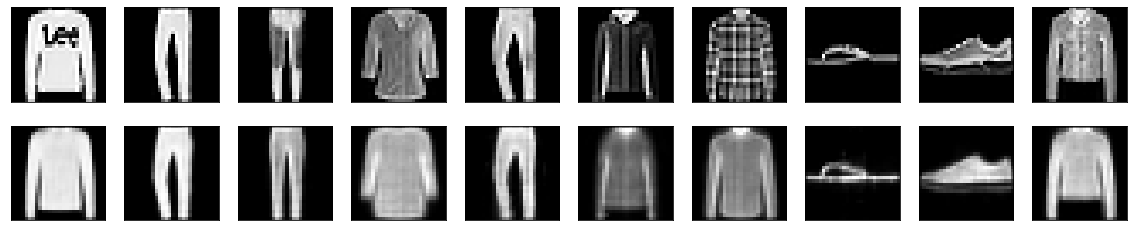

In [40]:

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(test_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Visualizacion del espacio latente

In [41]:
encoded_images_test = encoder(test_images)

In [42]:
encoded_images_test

<tf.Tensor: shape=(10000, 3), dtype=float32, numpy=
array([[ -8.502465  , -10.889876  ,  -7.430733  ],
       [ 10.588472  ,   2.505608  ,  -0.1656076 ],
       [  4.976826  , -40.149708  ,  -6.614204  ],
       ...,
       [  5.6553164 ,  -7.8051815 ,   2.2036033 ],
       [  5.907004  , -44.845676  ,  27.519419  ],
       [ -4.7138505 ,  -6.627401  ,  -0.08650687]], dtype=float32)>

In [52]:
test_images_labels = []

for label_code in test_labels:
  test_images_labels.append(class_names[label_code])

test_images_labels[0:10]


['Ankle boot',
 'Pullover',
 'Trouser',
 'Trouser',
 'Shirt',
 'Trouser',
 'Coat',
 'Shirt',
 'Sandal',
 'Sneaker']

In [56]:
encoded_dataframe = pd.DataFrame(encoded_images_test.numpy())
encoded_dataframe['label'] = test_images_labels
encoded_dataframe.columns = ['x', 'y', 'z', 'label']
encoded_dataframe

,x,y,z,label
0,-8.502465,-10.889876,-7.430733,Ankle boot
1,10.588472,2.505608,-0.165608,Pullover
2,4.976826,-40.149708,-6.614204,Trouser
3,4.485644,-26.352396,4.530185,Trouser
4,4.681077,0.639662,-3.536923,Shirt
...,...,...,...,...
9995,-8.663985,-16.125687,-15.049839,Ankle boot
9996,3.323493,-17.787369,6.105811,Trouser
9997,5.655316,-7.805182,2.203603,Bag
9998,5.907004,-44.845676,27.519419,Trouser


In [57]:
df = px.data.iris()
fig = px.scatter_3d(encoded_dataframe, x='x', y='y', z='z',
              color='label')
fig.show()

Creando nuevas prendas de vestir!!

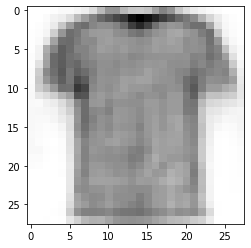

In [106]:
g = tf.random.Generator.from_non_deterministic_state()

random_latent_space = g.normal(shape=(1, 3))
ropa_random = decoder(random_latent_space)
imagen_ropa_random = tf.reshape(ropa_random, [28,28])
plt.imshow(imagen_ropa_random, cmap=plt.cm.binary)